# Grover' Algorithm for 2 solution

##### considering solution as |0110> and |1110>

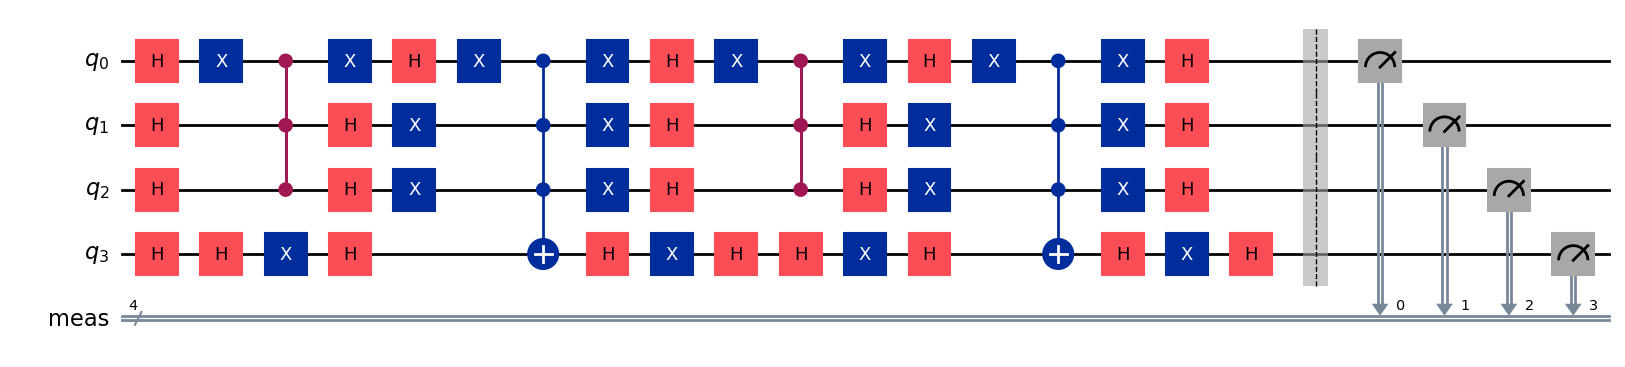

In [45]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector
import matplotlib.pyplot as plt

qc = QuantumCircuit(4)      # Create quantum circuit: 4 input qubits 


for i in range(4):  # Apply Hadamard to all input qubits
    qc.h(i)

# Oracle for marking |0110> and |1110>

qc.x(0)  # flipping 4 th qubit

qc.ccz(1,2, 0)  # marking desired state

qc.x(0)

for i in range(4):  # Apply Hadamard to all input qubits
    qc.h(i)

for i in range(4):     # Apply X gate to all input qubits in order to mark |0000>
    qc.x(i)

                # fliping sign of |0000>
qc.h(3)
qc.mcx([0, 1, 2], 3)  # MCX is multi-controlled X (Toffoli)
qc.h(3)


for i in range(4):   # Apply X gate to all input qubits
    qc.x(i)

for i in range(4):  # Apply Hadamard to all input qubits
    qc.h(i)


# Second Itteration

qc.x(0)  # flipping 4 th qubit

qc.ccz(1,2, 0)  # marking desired state

qc.x(0)

for i in range(4):  # Apply Hadamard to all input qubits
    qc.h(i)

for i in range(4):     # Apply X gate to all input qubits in order to mark |0000>
    qc.x(i)

                # fliping sign of |0000>
qc.h(3)
qc.mcx([0, 1, 2], 3)  # MCX is multi-controlled X (Toffoli)
qc.h(3)


for i in range(4):   # Apply X gate to all input qubits
    qc.x(i)

for i in range(4):  # Apply Hadamard to all input qubits
    qc.h(i)


state = Statevector.from_instruction(qc)

qc.measure_all()

qc.draw(output='mpl') ; 

    


In [46]:
print("Statevector after amplitude Magnifivation :\n")

for i in range(16):
    binary = format(i, '04b')
    real = round(state.data[i].real, 3)
    imag = round(state.data[i].imag, 3)
    print(f"|{binary}⟩: {real} + {imag}j")

Statevector after amplitude Magnifivation :

|0000⟩: -0.062 + 0.0j
|0001⟩: -0.062 + 0.0j
|0010⟩: -0.062 + 0.0j
|0011⟩: -0.062 + 0.0j
|0100⟩: -0.062 + 0.0j
|0101⟩: -0.062 + 0.0j
|0110⟩: 0.687 + 0.0j
|0111⟩: -0.062 + 0.0j
|1000⟩: -0.062 + 0.0j
|1001⟩: -0.062 + 0.0j
|1010⟩: -0.062 + 0.0j
|1011⟩: -0.062 + 0.0j
|1100⟩: -0.062 + 0.0j
|1101⟩: -0.062 + 0.0j
|1110⟩: 0.687 + 0.0j
|1111⟩: -0.062 + 0.0j


In [47]:
from qiskit import transpile
from qiskit_aer import AerSimulator
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
result=simulator.run(compiled_circuit, shots=4096).result()
counts = result.get_counts()
print("Measurement Results:", counts)


Measurement Results: {'1110': 1967, '0110': 1895, '1100': 20, '1101': 11, '0010': 17, '0111': 23, '1010': 17, '1001': 17, '0000': 18, '0011': 20, '0101': 16, '1000': 14, '1111': 12, '0100': 20, '0001': 12, '1011': 17}


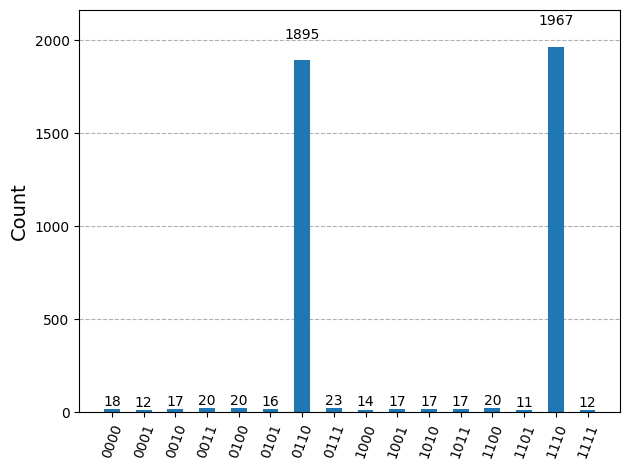

In [48]:
%matplotlib inline
plot_histogram(counts)
plt.show()